In [1]:
# Load the coordinates file
csv_file_name = "/media/siddhesh/D1-k/Kaggle-Ovarian/output_overlap_folder/queried_coordinates_temp.csv"

# Load the image folder
image_folder = "/media/siddhesh/D1-k/Kaggle-Ovarian/train_images"

In [2]:
import os

def get_query_patch_and_coordinates(
    patches_hdf5_file, coordinates_hdf5_file, patch_key
):
    query_patch_data = patches_hdf5_file[patch_key][
        len(patches_hdf5_file[patch_key]) // 2
    ]
    all_coordinates_selected_patch = coordinates_hdf5_file[patch_key]
    patch_coordinates = all_coordinates_selected_patch[
        len(all_coordinates_selected_patch) // 2
    ]
    return query_patch_data, patch_coordinates


In [5]:
import h5py

patches_hdf5_path = (
"/media/siddhesh/D1-k/Kaggle-Ovarian/output_overlap_folder/patches.hdf5"
)
coordinates_hdf5_path = (
"/media/siddhesh/D1-k/Kaggle-Ovarian/output_overlap_folder/coordinates.hdf5"
)
csv_file_name = "/media/siddhesh/D1-k/Kaggle-Ovarian/output_overlap_folder/queried_coordinates_temp.csv"
with h5py.File(patches_hdf5_path, "r") as patches_hdf5_file, h5py.File(
        coordinates_hdf5_path, "r"
    ) as coordinates_hdf5_file:
    patch_key = list(patches_hdf5_file.keys())[0]
    query_patch_data, patch_coordinates = get_query_patch_and_coordinates(
        patches_hdf5_file, coordinates_hdf5_file, patch_key
    )

In [7]:
print(patch_key, query_patch_data.shape, patch_coordinates)

10077 (1, 192) [18432 25600]


/media/siddhesh/D1-k/Kaggle-Ovarian/train_images/10077.png


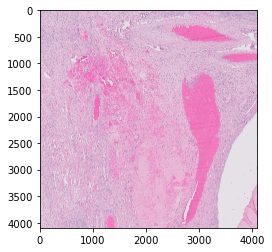

In [12]:
# Load this image and plot it for the particular coordinates for a patch size of 4096x4096
import PIL.Image
PIL.Image.MAX_IMAGE_PIXELS = 20805484500
image_path = os.path.join(image_folder, patch_key + ".png")
print(image_path)

import matplotlib.pyplot as plt

from skimage.io import imread

image = imread(image_path)
# Take a crop
x, y = patch_coordinates
patch_size = 4096
patch = image[x : x + patch_size, y : y + patch_size]

plt.imshow(patch)


In [13]:
# Now for 10 images of the query patch, find the top 10 similar image patches from the same image
# Use the cosine similarity metric

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

with h5py.File(patches_hdf5_path, "r") as patches_hdf5_file, h5py.File(
        coordinates_hdf5_path, "r"
    ) as coordinates_hdf5_file:

    patch_key = list(patches_hdf5_file.keys())[0]
    query_patch_data, _ = get_query_patch_and_coordinates(
        patches_hdf5_file, coordinates_hdf5_file, patch_key
    )
    
    query_patch_data = query_patch_data.reshape(1, -1)

    # Initialize an empty list to store (similarity, coordinates) pairs
    similarity_coordinates_list = []

    # Retrieve patch data and corresponding coordinates
    patch_data = patches_hdf5_file[patch_key]
    coordinates = coordinates_hdf5_file[patch_key]
    
    # Calculate the cosine similarity for each patch
    for index, patch in enumerate(patch_data):
        patch_reshaped = patch.reshape(1, -1)
        similarity = cosine_similarity(query_patch_data, patch_reshaped)
        similarity_coordinates_list.append((similarity[0][0], coordinates[index]))

    # Sort by similarity and take top 10
    top_10_similar_patches = sorted(similarity_coordinates_list, key=lambda x: x[0], reverse=True)[:10]
    
    print("Top 10 similar patches and their coordinates:")
    for similarity, coord in top_10_similar_patches:
        print(f"Similarity: {similarity}, Coordinates: {coord}")

Top 10 similar patches and their coordinates:
Similarity: 1.0, Coordinates: [1024 4096]
Similarity: 0.9497545957565308, Coordinates: [ 1024 16384]
Similarity: 0.9394598007202148, Coordinates: [ 1024 37888]
Similarity: 0.9326424598693848, Coordinates: [ 1024 39936]
Similarity: 0.912560760974884, Coordinates: [    0 39936]
Similarity: 0.9007829427719116, Coordinates: [    0 29696]
Similarity: 0.9000422358512878, Coordinates: [ 1024 28672]
Similarity: 0.8965907096862793, Coordinates: [1024 5120]
Similarity: 0.8860945701599121, Coordinates: [    0 30720]
Similarity: 0.872471809387207, Coordinates: [ 1024 36864]


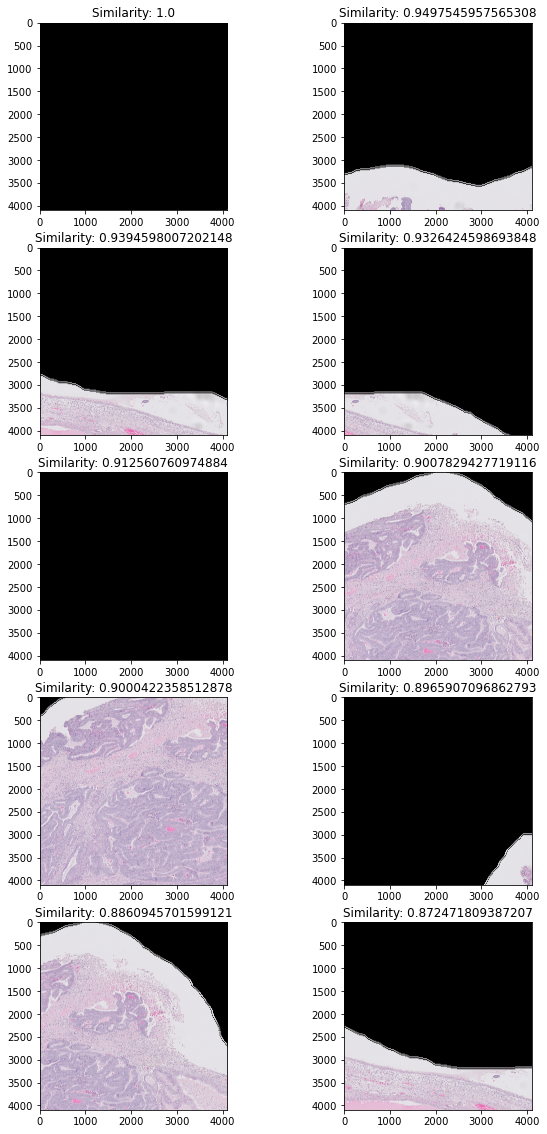

In [14]:
# Plot these top 10 patches in a grid of 5x2
import matplotlib.pyplot as plt
from skimage.io import imread

fig, axes = plt.subplots(5, 2, figsize=(10, 20))
for index, (similarity, coord) in enumerate(top_10_similar_patches):
    x, y = coord
    patch_size = 4096
    patch = image[x : x + patch_size, y : y + patch_size]
    axes[index // 2, index % 2].imshow(patch)
    axes[index // 2, index % 2].set_title(f"Similarity: {similarity}")

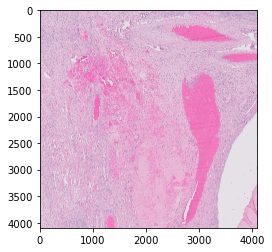

In [15]:
# Take a crop
x, y = patch_coordinates
patch_size = 4096
patch = image[x : x + patch_size, y : y + patch_size]

plt.imshow(patch)


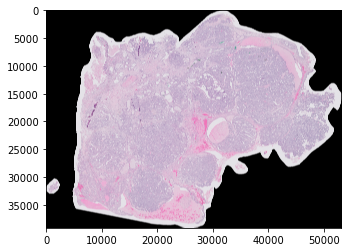

In [16]:
plt.imshow(image)

In [17]:
# Save the image patch to a file
import PIL.Image
temp_folder = "/media/siddhesh/D1-k/Kaggle-Ovarian/output_overlap_folder/testing/"
PIL.Image.MAX_IMAGE_PIXELS = 20805484500

image_path = os.path.join(image_folder, patch_key + ".png")

from skimage.io import imsave
imsave(os.path.join(temp_folder, patch_key + ".png"), patch)